In [135]:
#Suppress Warning
import warnings
warnings.filterwarnings('ignore')

In [136]:
#Importing numpy and pandas packages
import numpy as np
import pandas as pd

## Checkpoint 1: Data Cleaning

-  ### Subtask 1.1: Loading the companies and rounds data into two data frames and name them companies and rounds2 respectively.


In [137]:
#making data frame for companies by reading companies.txt
location_companies_txt = "companies.txt"
companies=pd.read_csv(location_companies_txt,sep ="\t",encoding="ISO8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [138]:
print(round(100*(companies.isnull().sum()/len(companies.index)),2))
companies = companies.drop('founded_at', axis=1)
companies.shape

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64


(66368, 9)

In [139]:
#making data frame for rounds2 by reading rounds2.csv
location_rounds2_csv = "rounds2.csv"
rounds2=pd.read_csv(location_rounds2_csv,sep =",",encoding="ISO8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [140]:
print(round(100*(rounds2.isnull().sum()/len(rounds2.index)),2))
rounds2 = rounds2.drop('funding_round_code', axis=1)
rounds2.shape

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64


(114949, 5)

In [141]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign


In [142]:
#cleaning data for special characters for all the columns data for companies dataframe
companies.permalink=companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.name=companies.name.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.homepage_url=companies.homepage_url.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.category_list=companies.category_list.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.status=companies.status.str.encode('utf-8').str.decode('ascii', 'ignore')
companies.country_code=companies.country_code.str.encode('utf-8').str.decode('ascii', 'ignore')

In [143]:
#cleaning data for special characters for all the columns data for rounds2 dataframe
rounds2.company_permalink=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.funding_round_permalink=rounds2.funding_round_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.funding_round_type=rounds2.funding_round_type.str.encode('utf-8').str.decode('ascii', 'ignore')
#rounds2.funding_round_code=rounds2.funding_round_code.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds2.funded_at=rounds2.funded_at.str.encode('utf-8').str.decode('ascii', 'ignore')
#rounds2.raised_amount_usd=rounds2.raised_amount_usd.str.encode('utf-8').str.decode('ascii', 'ignore')

## Checkpoint 1: Data Cleaning

-  ### Subtask 1.2 : Understand the dataset

    -  #### Subtask 1.2.1 : How many unique companies are present in rounds2?


In [144]:
#How many unique companies are present in rounds2?
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.upper())
rounds2_unique=rounds2['company_permalink'].unique()
print(rounds2_unique.shape)

(66368,)


## Checkpoint 1: Data Cleaning

-  ### Subtask 1.2 : Understand the dataset

    -  #### Subtask 1.2.2 : How many unique companies are present in companies?


In [145]:
#How many unique companies are present in companies?
companies['permalink']=companies['permalink'].apply(lambda x: x.upper())
companies_unique=companies['permalink'].unique()
print(companies_unique.shape)
#if we check for permalink, after unique it gives same shape as 66368

(66368,)


## Checkpoint 1: Data Cleaning

-  ### Subtask 1.2 : Understand the dataset

    -  #### Subtask 1.2.3 : In the companies data frame, which column can be used as the unique key for each company? 
## Answer : permalink    


## Task 1: Data Cleaning

-  ### Subtask 1.2 : Understand the dataset

    -  #### Subtask 1.2.4 : Are there any companies in the rounds2 file which are not present in companies?
## Answer : No    


In [146]:
#Are there any companies in the rounds2 file which are not present in companies?
companies['permalink']=companies['permalink'].apply(lambda x: x.upper())
rounds2['company_permalink']=rounds2['company_permalink'].apply(lambda x: x.upper())
rounds2_permalink_set=set(rounds2['company_permalink'])
companies_permalink_set=set(companies['permalink'])
differences_set= companies_permalink_set.difference(rounds2_permalink_set)
differences_set2= rounds2_permalink_set.difference(companies_permalink_set)
len(differences_set2)

0

## Checkpoint 1: Data Cleaning

-  ### Subtask 1.2 : Understand the dataset

    -  #### Subtask 1.2.5 : Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
    
## Answer : 114949 rows


In [147]:
#Merge the two data frames so that all variables (columns)
#in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame.
rounds2 = rounds2.rename(columns={'company_permalink':'permalink'})
master_frame = pd.merge(companies,rounds2,how='inner',on='permalink')
print(master_frame.shape)
master_frame.head()

(114949, 13)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


## Checkpoint 2: Funding Type Analysis

-   ###  Subtask 2.1 : Average funding amount of venture type

In [148]:
#  Average funding amount of venture type

#changing raised_amount_usd column values to millions

master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000


In [149]:
#  Average funding amount of venture type

# creating venture dataframe

venture_df=master_frame[master_frame.funding_round_type=='venture']

#rouding off to 2 decimal places for readibililty
round(venture_df['raised_amount_usd'].mean(),2)


11.75

## Checkpoint 2: Funding Type Analysis

-   ###  Subtask 2.2 : Average funding amount of angel type

In [150]:
angel_df=master_frame[master_frame.funding_round_type=='angel']

#rouding off to 2 decimal places for readibililty
round(angel_df['raised_amount_usd'].mean(),2)


0.96

## Checkpoint 2: Funding Type Analysis

-   ###  Subtask 2.3 : Average funding amount of seed type

In [151]:
seed_df=master_frame[master_frame.funding_round_type=='seed']

#rouding off to 2 decimal places for readibililty
round(seed_df['raised_amount_usd'].mean(),2)


0.72

## Checkpoint 2: Funding Type Analysis

-   ###  Subtask 2.4 : Average funding amount of private equity type

In [152]:
private_equity_df=master_frame[master_frame.funding_round_type=='private_equity']

#rouding off to 2 decimal places for readibililty
round(private_equity_df['raised_amount_usd'].mean(),2)


73.31

## Checkpoint 2: Funding Type Analysis

-   ###  Subtask 2.5 : Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it?

## Answer : Venture type


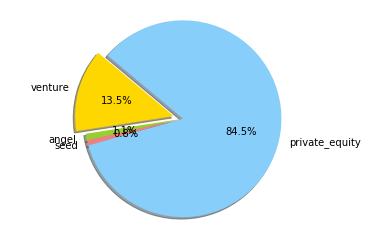

In [153]:
import matplotlib.pyplot as plt
# Data to plot
labels = 'venture', 'angel', 'seed', 'private_equity'
sizes = [venture_df['raised_amount_usd'].mean(), angel_df['raised_amount_usd'].mean(), seed_df['raised_amount_usd'].mean(), private_equity_df['raised_amount_usd'].mean()]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Checkpoint 3: Country Analysis

-   ###  Subtask 3.1 : creating dataframe top9 for countries with max investment in Venture

In [154]:
#using group by on Venture DF created in checkpoint 2
by_country = venture_df.groupby('country_code')
top9 = by_country['raised_amount_usd'].sum().sort_values(ascending = False).head(9)
print(top9.head(9))

country_code
USA    422510.842796
CHN     39835.418773
GBR     20245.627416
IND     14391.858718
CAN      9583.332317
FRA      7259.536732
ISR      6907.514579
DEU      6346.959822
JPN      3363.676611
Name: raised_amount_usd, dtype: float64


-   ###  Subtask 3.2 : Identify the top 3 english speaking countries in dataframe top9
     1. Top English    - USA             
     2. Second English - GBR	 
     3. Third English  - IND

(with reference to the list of English speaking countries provided in problem statement section)

## Checkpoint 4: Sector Analysis1

-   ###  Subtask 4.1 : Populating primary sector of all companies

In [155]:
#get primary sector for each company
master_frame['primary_sector'] = (master_frame['category_list']).apply(lambda x: str(x).split("|")[0])
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,Media
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,Application Platforms
2,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,Application Platforms
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,Apps
4,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,Curated Web


-   ###  Subtask 4.2 : Import mapping.csv and populate main sectors

In [156]:
#Create a sector_mapping data frame for companies using the provided input data file mapping.csv
location_mapping_csv = "mapping.csv"
sector_mapping=pd.read_csv(location_mapping_csv,sep =",",encoding="ISO8859-1")
sector_mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [157]:
# Cleaning null category_lists - Blank Sectors can't be considered for decision making of investment sector

sector_mapping.dropna(subset=['category_list'], inplace=True)
sector_mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [158]:
#populate main sector in master_frame using sector_mapping dataframe
sector_df = pd.melt(sector_mapping,id_vars=["category_list"]);
sector_df= sector_df[sector_df['value'] == 1]
sector_df = sector_df.drop('value',axis=1)
sector_df = sector_df.rename(columns={'variable':'main_sector'})
sector_df = sector_df.rename(columns={'category_list':'primary_sector'})

sector_df['primary_sector']=sector_df['primary_sector'].apply(lambda x: x.upper())
sector_df['main_sector']=sector_df['main_sector'].apply(lambda x: x.upper())





In [159]:
master_frame['primary_sector']=master_frame['primary_sector'].apply(lambda x: x.upper())
master_frame = pd.merge(master_frame,sector_df,how='inner',on='primary_sector')
master_frame = master_frame.drop_duplicates(subset=None,keep='first', inplace=False)
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.0,MEDIA,ENTERTAINMENT
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15.0,MEDIA,ENTERTAINMENT
2,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5.8,MEDIA,ENTERTAINMENT
3,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18.0,MEDIA,ENTERTAINMENT
4,/ORGANIZATION/A-B-PRODUCTIONS,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,21-01-2014,NaN,MEDIA,ENTERTAINMENT


In [160]:
master_frame.shape


(103397, 15)

## Checkpoint 5: Sector Analysis 2

-   ###  Subtask 5.1 : Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range.



## D1 (USA DataFrame) with total_amount_of_investments and total_number_of_investments

In [161]:
# creating data frame D1 for USA

master_frame['country_code']=master_frame['country_code'].apply(lambda x: str(x).upper())
D1 = master_frame[master_frame['country_code']=='USA']
D1['funding_round_type']=D1['funding_round_type'].apply(lambda x: x.upper())
D1 = D1[D1['funding_round_type']=='VENTURE']
D1 = D1[D1['raised_amount_usd'] <=15]
D1 = D1[D1['raised_amount_usd'] >=5]
D1_1=D1.groupby('main_sector').agg({'primary_sector': 'count', 'raised_amount_usd': 'sum'})
D1_1 = D1_1.rename(columns={'primary_sector':'Investment_count'})
D1_1 = D1_1.rename(columns={'raised_amout_usd':'Investment_sum'})
D1=D1.merge(D1_1, how='left', left_on='main_sector', right_on='main_sector')
D1 = D1.rename(columns={'primary_sector_x':'primary_sector'})
D1 = D1.rename(columns={'raised_amount_usd_x':'raised_amount_usd'})
D1 = D1.rename(columns={'primary_sector_y':'total_number_of_investments'})
D1 = D1.rename(columns={'raised_amount_usd_y':'total_amount_of_investments'})
print(D1.shape)
D1.head()

(11149, 17)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,total_amount_of_investments
0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,/funding-round/452a2342fe720285c3b92e9bd927d9ba,VENTURE,06-08-2014,5.0,MEDIA,ENTERTAINMENT,580,5000.212982
1,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,/funding-round/adca195749ae9ace84684723fbe75e5b,VENTURE,26-02-2015,5.0,MEDIA,ENTERTAINMENT,580,5000.212982
2,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,VENTURE,01-08-2006,5.0,MEDIA,ENTERTAINMENT,580,5000.212982
3,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,/funding-round/9241ae16e08df17ebdc064e49e23035a,VENTURE,01-09-2007,5.0,MEDIA,ENTERTAINMENT,580,5000.212982
4,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,/funding-round/41ac526630da57ad6eb9d02431b17657,VENTURE,01-09-2007,10.0,MEDIA,ENTERTAINMENT,580,5000.212982


## Checkpoint 5 : 

## D2 (GBR DataFrame) with total_amount_of_investments and total_number_of_investments

In [162]:
# creating data frame D2 for GBR

master_frame['country_code']=master_frame['country_code'].apply(lambda x: str(x).upper())
D2 = master_frame[master_frame['country_code']=='GBR']
D2['funding_round_type']=D2['funding_round_type'].apply(lambda x: x.upper())
D2 = D2[D2['funding_round_type']=='VENTURE']
D2 = D2[D2['raised_amount_usd'] <=15]
D2 = D2[D2['raised_amount_usd'] >=5]
D2_1=D2.groupby('main_sector').agg({'primary_sector': 'count', 'raised_amount_usd': 'sum'})
D2_1 = D2_1.rename(columns={'primary_sector':'Investment_count'})
D2_1 = D2_1.rename(columns={'raised_amout_usd':'Investment_sum'})
D2=D2.merge(D2_1, how='left', left_on='main_sector', right_on='main_sector')
D2 = D2.rename(columns={'primary_sector_x':'primary_sector'})
D2 = D2.rename(columns={'raised_amount_usd_x':'raised_amount_usd'})
D2 = D2.rename(columns={'primary_sector_y':'total_number_of_investments'})
D2 = D2.rename(columns={'raised_amount_usd_y':'total_amount_of_investments'})
print(D2.shape)
D2.head()

(577, 17)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,total_amount_of_investments
0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,VENTURE,06-10-2015,15.00,MEDIA,ENTERTAINMENT,54,461.511059
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,/funding-round/bd626ed022f5c66574b1afe234f3c90d,VENTURE,07-05-2013,5.80,MEDIA,ENTERTAINMENT,54,461.511059
2,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,VENTURE,09-07-2014,10.00,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING",73,615.746235
3,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,VENTURE,01-10-2014,5.46,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING",73,615.746235
4,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,VENTURE,05-10-2015,5.40,APPLICATION PLATFORMS,"NEWS, SEARCH AND MESSAGING",73,615.746235


## Checkpoint 5 : 

## D3 (IND DataFrame) with total_amount_of_investments and total_number_of_investments

In [168]:
# creating data frame D3 for IND

master_frame['country_code']=master_frame['country_code'].apply(lambda x: str(x).upper())
D3 = master_frame[master_frame['country_code']=='IND']
D3['funding_round_type']=D3['funding_round_type'].apply(lambda x: x.upper())
D3 = D3[D3['funding_round_type']=='VENTURE']
D3 = D3[D3['raised_amount_usd'] <=15]
D3 = D3[D3['raised_amount_usd'] >=5]
D3_1=D3.groupby('main_sector').agg({'primary_sector': 'count', 'raised_amount_usd': 'sum'})
D3_1 = D3_1.rename(columns={'primary_sector':'Investment_count'})
D3_1 = D3_1.rename(columns={'raised_amout_usd':'Investment_sum'})
D3=D3.merge(D3_1, how='left', left_on='main_sector', right_on='main_sector')
D3 = D3.rename(columns={'primary_sector_x':'primary_sector'})
D3 = D3.rename(columns={'raised_amount_usd_x':'raised_amount_usd'})
D3 = D3.rename(columns={'primary_sector_y':'total_number_of_investments'})
D3 = D3.rename(columns={'raised_amount_usd_y':'total_amount_of_investments'})
print(D3.shape)
D3.head()

(299, 17)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,main_sector,Investment_count,total_amount_of_investments
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,VENTURE,05-01-2015,10.000000,MEDIA,ENTERTAINMENT,33,280.830000
1,/ORGANIZATION/CHILLR-2,Chillr,http://chillr.in,Apps|Banking|Mobile Payments,operating,IND,13,Cochin,Cochin,/funding-round/c5477ed0c5d0f47db4d010094abcd317,VENTURE,02-10-2015,6.000000,APPS,"NEWS, SEARCH AND MESSAGING",52,433.834545
2,/ORGANIZATION/JUGNOO,JUGNOO,https://jugnoo.in/#/,Apps|Social Business|Software,operating,IND,5,Chandigarh,Chandigarh,/funding-round/89fc1dc3e31be5732df0fcabca9a0c08,VENTURE,05-06-2015,5.000000,APPS,"NEWS, SEARCH AND MESSAGING",52,433.834545
3,/ORGANIZATION/PEPPERTAP,PepperTap,http://www.peppertap.com,Apps|Groceries|Online Shopping,operating,IND,10,New Delhi,Gurgaon,/funding-round/2c5621fec872c82f48ebbab0b7cfa6a0,VENTURE,14-04-2015,10.000000,APPS,"NEWS, SEARCH AND MESSAGING",52,433.834545
4,/ORGANIZATION/TINYOWL-TECHNOLOGY,TinyOwl Technology,http://tinyowl.com/,Apps|Mobile|Specialty Foods,operating,IND,16,Mumbai,Mumbai,/funding-round/6139214390beddb0910642f6c5bf27b6,VENTURE,30-10-2015,7.665775,APPS,"NEWS, SEARCH AND MESSAGING",52,433.834545


## Checkpoint 5

## Table 5.1
## Note: In the following table, all the observations refer to investments of the type Venture within 5-15 M USD range.

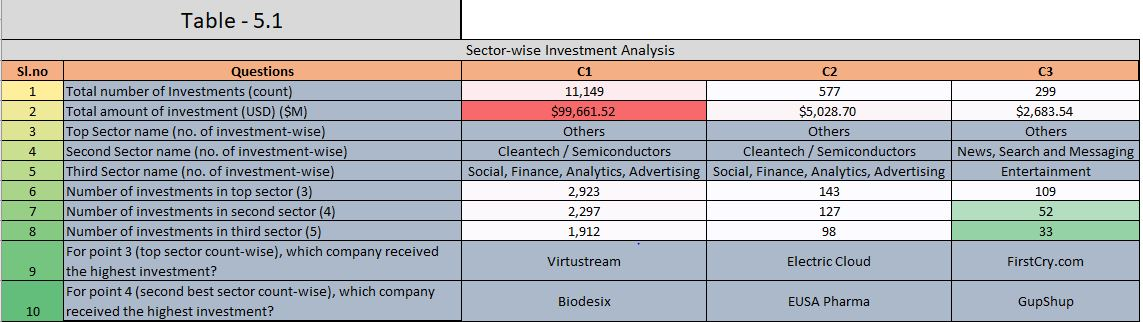

In [169]:
#Q1 - Count of Investment
print("Count of investment USA: {}".format(D1_1['Investment_count'].sum()))
print("Count of investment GBR: {}".format(D2_1['Investment_count'].sum()))
print("Count of investment IND: {}".format(D3_1['Investment_count'].sum()))
print("\n")

#Q2 - Sum of Investment
print("Sum of investment USA: {}".format(D1_1['raised_amount_usd'].sum()))
print("Sum of investment GBR: {}".format(D2_1['raised_amount_usd'].sum()))
print("Sum of investment IND: {}".format(D3_1['raised_amount_usd'].sum()))
print("\n")

#Q3,Q4,Q5,Q6,Q7,Q8
print("Count of investments in USA for finding top sector")
print(D1_1.sort_values(['Investment_count'], ascending=False).head(3))

print("\n\n\nCount of investments in GBR for finding top sector")
print(D2_1.sort_values(['Investment_count'], ascending=False).head(3))

print("\n\n\nCount of investments in IND for finding top sector")
print(D3_1.sort_values(['Investment_count'], ascending=False).head(3))

#Q9
print("\n")
print("USA's best company to investment in for 'Others' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D1_Others = D1[D1['main_sector']=='OTHERS']
D1_Others_stats = (D1_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D1_Others_stats = D1_Others_stats.rename(columns={ D1_Others_stats.columns[0]: "Sum_Investments"})
print(D1_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

print("\n")
print("GBR's best company to investment in for 'Others' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D2_Others = D2[D2['main_sector']=='OTHERS']
D2_Others_stats = (D2_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D2_Others_stats = D2_Others_stats.rename(columns={ D2_Others_stats.columns[0]: "Sum_Investments"})
print(D2_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

print("\n")
print("IND's best company to investment in for 'Others' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D3_Others = D3[D3['main_sector']=='OTHERS']
D3_Others_stats = (D3_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D3_Others_stats = D3_Others_stats.rename(columns={ D3_Others_stats.columns[0]: "Sum_Investments"})
print(D3_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

#Q10
print("\n")
print("USA's best company to investment in for 'CLEANTECH / SEMICONDUCTORS' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D1_Others = D1[D1['main_sector']=='CLEANTECH / SEMICONDUCTORS']
D1_Others_stats = (D1_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D1_Others_stats = D1_Others_stats.rename(columns={ D1_Others_stats.columns[0]: "Sum_Investments"})
print(D1_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

print("\n")
print("GBR's best company to investment in for 'CLEANTECH / SEMICONDUCTORS' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D2_Others = D2[D2['main_sector']=='CLEANTECH / SEMICONDUCTORS']
D2_Others_stats = (D2_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D2_Others_stats = D2_Others_stats.rename(columns={ D2_Others_stats.columns[0]: "Sum_Investments"})
print(D2_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

print("\n")
print("IND's best company to investment in for 'NEWS, SEARCH AND MESSAGING' Sector with investment size '5mn-15mn' in the 'Venture' investment type")
D3_Others = D3[D3['main_sector']=='NEWS, SEARCH AND MESSAGING']
D3_Others_stats = (D3_Others.loc[:,['name', 'raised_amount_usd']]).groupby('name').agg({'raised_amount_usd': 'sum'})
D3_Others_stats = D3_Others_stats.rename(columns={ D3_Others_stats.columns[0]: "Sum_Investments"})
print(D3_Others_stats.sort_values(['Sum_Investments'], ascending=[False]).head(1))

Count of investment USA: 11149
Count of investment GBR: 577
Count of investment IND: 299


Sum of investment USA: 99661.52454899998
Sum of investment GBR: 5028.704358000001
Sum of investment IND: 2683.537552


Count of investments in USA for finding top sector
                                         Investment_count  raised_amount_usd
main_sector                                                                 
OTHERS                                               2923       26089.280296
CLEANTECH / SEMICONDUCTORS                           2297       21181.003033
SOCIAL, FINANCE, ANALYTICS, ADVERTISING              1912       16680.695048



Count of investments in GBR for finding top sector
                                         Investment_count  raised_amount_usd
main_sector                                                                 
OTHERS                                                143        1249.124289
CLEANTECH / SEMICONDUCTORS                            127        1136